In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix ,classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
train_data=pd.read_csv('train_Titanic.csv')
test_data=pd.read_csv('test_Titanic.csv')
train_pass=train_data.shape[0]

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data.loc[(train_data.Age >=0)  & (train_data.Age <=9),'age_group'] = '0-9'
train_data.loc[(train_data.Age >=10) &(train_data.Age <=19),'age_group'] = '10-19'
train_data.loc[(train_data.Age >=20) & (train_data.Age <=29),'age_group'] = '20-29'
train_data.loc[(train_data.Age >=30) & (train_data.Age <=39),'age_group'] = '30-39'
train_data.loc[(train_data.Age >=40) & (train_data.Age <=49),'age_group'] = '40-49'
train_data.loc[(train_data.Age >=50) & (train_data.Age <=59),'age_group'] = '50-59'
train_data.loc[(train_data.Age >=60) & (train_data.Age <=69),'age_group'] = '60-69'
train_data.loc[(train_data.Age >=70) & (train_data.Age <=80),'age_group'] = '70-80'

In [9]:
age_group=train_data.groupby(['age_group'])['Survived'].value_counts().unstack(-2)

age_group.rename(index={1: 'Survived',0:'Not-survived'}, inplace=True)
age_group.index.name = 'Survived ?'
age_group.columns.name = 'Age_Group'
display(age_group.style.background_gradient(cmap='YlGnBu'))

Age_Group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-80
Survived ?,,,,,,,,
Not-survived,24,61,143,94,55,28,13,6
Survived,38,41,77,73,34,20,6,1


In [10]:
age_group=train_data.groupby(['age_group','Survived'])['Pclass'].value_counts().unstack(0)
age_group=age_group.fillna(0)
age_group=age_group.astype(int)
display(age_group.style.background_gradient(cmap='YlGnBu'))

In [ ]:
#Category that affected Srirving rate

In [11]:
cols=['Pclass',"Sex","SibSp","Parch",'age_group']
Data=pd.DataFrame()
for i in cols:
    Data=train_data.groupby(i)['Survived'].value_counts().unstack()[1]/train_data.groupby(i)['Survived'].size()*100
    print('the percentage of survived %\n', Data,'\n------------------------------')

the percentage of survived %
 Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64 
------------------------------
the percentage of survived %
 Sex
female    74.203822
male      18.890815
dtype: float64 
------------------------------
the percentage of survived %
 SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5          NaN
8          NaN
dtype: float64 
------------------------------
the percentage of survived %
 Parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4          NaN
5    20.000000
6          NaN
dtype: float64 
------------------------------
the percentage of survived %
 age_group
0-9      61.290323
10-19    40.196078
20-29    35.000000
30-39    43.712575
40-49    38.202247
50-59    41.666667
60-69    31.578947
70-80    14.285714
dtype: float64 
------------------------------


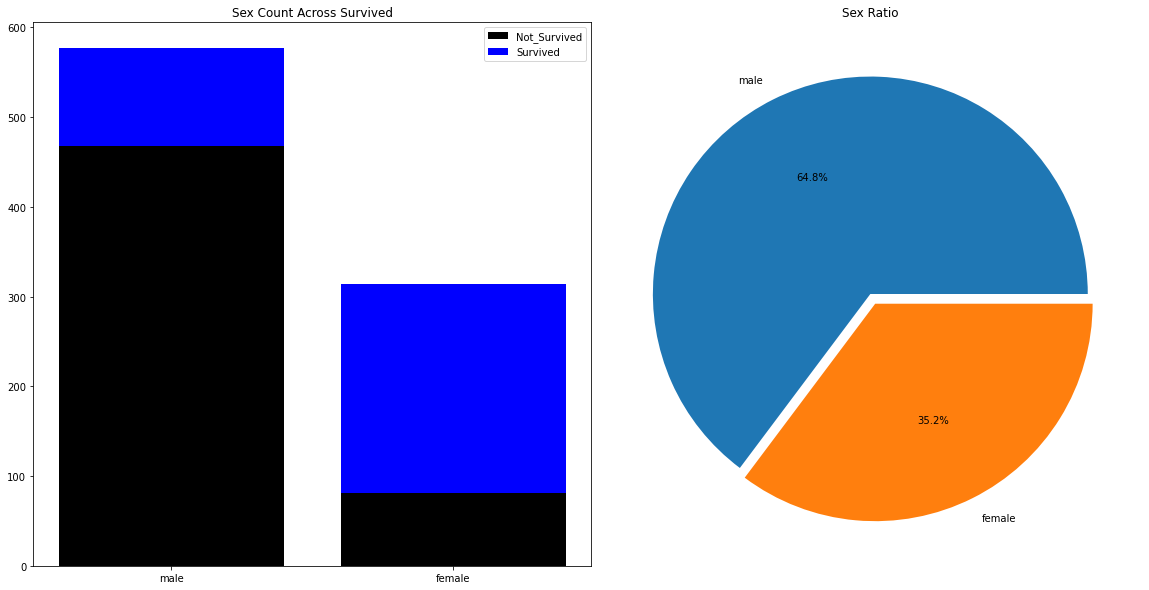

In [12]:
data=train_data['Sex'].value_counts()
labels=data.index
data1=pd.DataFrame()
for i in range(labels.size):
    data1[labels[i]]=train_data.loc[(train_data.Sex ==labels[i])]['Survived'].value_counts()

X0=data1.loc[0]
X1=data1.loc[1]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.subplots_adjust(wspace=0)
ax2.set_title('Sex Ratio')
ax2.pie(data,explode=[0,0.05],autopct='%1.1f%%',labels=data.index)
ax1.bar(labels, X0,color='black')
ax1.bar(labels, X1,bottom=X0,color='blue')
ax1.legend(labels=['Not_Survived', 'Survived'])
ax1.set_title('Sex Count Across Survived')
plt.show()

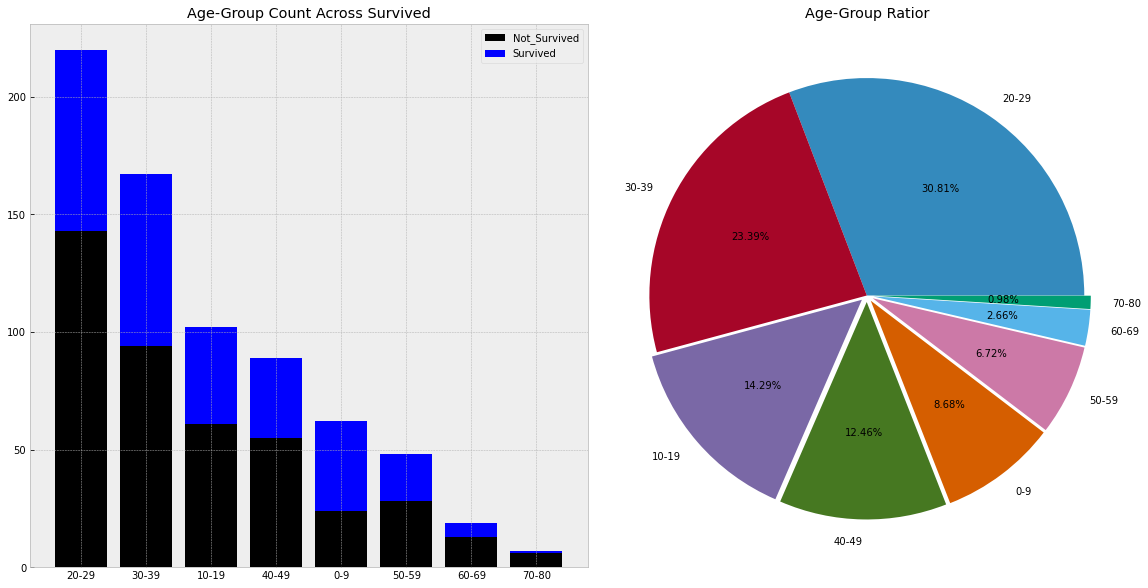

In [13]:
data=train_data['age_group'].value_counts()
labels=data.index
data1=pd.DataFrame()
for i in range(labels.size):
    data1[labels[i]]=train_data.loc[(train_data.age_group ==labels[i])]['Survived'].value_counts()

X0=data1.loc[0]
X1=data1.loc[1]
plt.style.use('bmh')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.subplots_adjust(wspace=0)
ax2.set_title('Age-Group Ratior')
ax2.pie(data, explode=[0,0,0.03,0.03,0.03,0.03,0.03,0.03], autopct='%2.2f%%',labels=data.index)
ax1.bar(labels, X0,color='black')
ax1.bar(labels, X1,bottom=X0,color='blue')
ax1.legend(labels=['Not_Survived', 'Survived'])
ax1.set_title('Age-Group Count Across Survived')

plt.show()

In [ ]:
#PreProcessing Data

In [16]:
target=train_data['Survived']
All_Features=pd.concat([train_data,test_data]).reset_index(drop=True)


In [17]:
All_Features['Title']=0
for i in All_Features:
    All_Features['Title']=All_Features.Name.str.extract('([A-Za-z]+)\.')  

In [18]:
All_Features['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Countess      1
Capt          1
Jonkheer      1
Dona          1
Don           1
Name: Title, dtype: int64

In [19]:
def missing_values(data):
    total=data.isnull().sum()
    percent=total/data.isnull().count()*100
    missing_values=(pd.concat([total,percent],axis=1,keys=['Total','Precent'])).sort_values(['Total'],ascending=False)
    missing_values=missing_values.drop((missing_values[missing_values['Total']==0]).index,0)
    return missing_values

In [20]:
display(missing_values(All_Features).head().style.background_gradient(cmap='Blues'))

,Total,Precent
Cabin,1014,77.463713
age_group,595,45.454545
Survived,418,31.932773
Age,263,20.091673
Embarked,2,0.152788


In [21]:
All_Features['Age']=All_Features.groupby(['Sex','Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))

In [22]:
All_Features['Embarked']=All_Features['Embarked'].fillna('S')

In [23]:
All_Features['Fare']=All_Features.groupby(['Sex','Pclass'])['Fare'].apply(lambda x:x.fillna(x.median()))

In [24]:
All_Features=All_Features.drop(['Cabin','Ticket','Name','PassengerId'],axis=1)

In [25]:
missing_values(All_Features).head()

,Total,Precent
age_group,595,45.454545
Survived,418,31.932773


In [26]:
#added New features 

In [27]:
All_Features['Family_Size']=All_Features['SibSp']+All_Features['Parch']
All_Features.loc[(All_Features.Family_Size == 0),'Solo_Passanger'] = 1
All_Features.loc[(All_Features.Family_Size > 0),'Solo_Passanger'] = 0

In [28]:
All_Features['Solo_Passanger'].value_counts()

1.0    790
0.0    519
Name: Solo_Passanger, dtype: int64

In [29]:
#Encoding Categorical columns

In [30]:
col=['Sex','Title','Embarked']
for i in col:
    All_Features[i]=LabelEncoder().fit_transform(All_Features[i])

In [31]:
All_Features=pd.get_dummies(All_Features)
All_Features.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size,Solo_Passanger,age_group_0-9,age_group_10-19,age_group_20-29,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60-69,age_group_70-80
0,0.0,3,1,22.0,1,0,7.2500,2,13,1,0.0,0,0,1,0,0,0,0,0
1,1.0,1,0,38.0,1,0,71.2833,0,14,1,0.0,0,0,0,1,0,0,0,0
2,1.0,3,0,26.0,0,0,7.9250,2,10,0,1.0,0,0,1,0,0,0,0,0
3,1.0,1,0,35.0,1,0,53.1000,2,14,1,0.0,0,0,0,1,0,0,0,0
4,0.0,3,1,35.0,0,0,8.0500,2,13,0,1.0,0,0,0,1,0,0,0,0


In [32]:
All_Features=All_Features.drop(['Survived','Age'],axis=1)
All_Features_SL = StandardScaler().fit_transform(All_Features)
print('All_Features shape: {}'.format(All_Features.shape))

All_Features shape: (1309, 17)


In [33]:
train=All_Features_SL[:train_pass]
test=All_Features_SL[train_pass:]
print('train shape: {}'.format(train.shape))
print('test shape: {}'.format(test.shape))
print('target shape: {}'.format(target.shape))

train shape: (891, 17)
test shape: (418, 17)
target shape: (891,)


In [34]:
#Feature importance

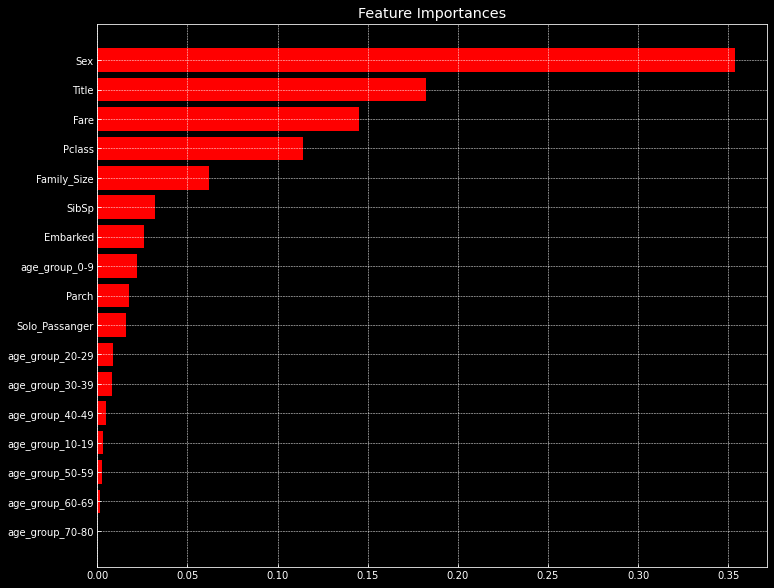

In [35]:
model = RandomForestClassifier(criterion='gini',n_estimators=1750,max_depth=7,min_samples_split=6,min_samples_leaf=6,
max_features='auto',oob_score=True,random_state=42,n_jobs=-1)
model.fit(All_Features[:target.shape[0]],target)

with plt.style.context('dark_background'):
    plt.figure(figsize=(12, 10))
    features=pd.Series(model.feature_importances_,All_Features.columns).sort_values(ascending=True)
    plt.barh(features.index ,features.values,color='red')
    plt.title('Feature Importances')
plt.show()

In [36]:
x_train,x_test,y_train,y_test=train_test_split(train,target,test_size=.33,random_state=42,shuffle=True)

In [37]:
print(x_train)

[[-1.54609786  0.74349692 -0.47908676 ...  5.1255081  -0.12136178
  -0.07332356]
 [ 0.84191642  0.74349692 -0.47908676 ... -0.19510261 -0.12136178
  -0.07332356]
 [-0.35209072  0.74349692  0.48128777 ... -0.19510261 -0.12136178
  -0.07332356]
 ...
 [ 0.84191642  0.74349692  1.4416623  ... -0.19510261 -0.12136178
  -0.07332356]
 [-1.54609786 -1.34499549  0.48128777 ... -0.19510261 -0.12136178
  -0.07332356]
 [-1.54609786  0.74349692 -0.47908676 ... -0.19510261 -0.12136178
  -0.07332356]]


In [38]:
#Logistic regression

Accuracy for  LogisticRegression is  0.8067796610169492


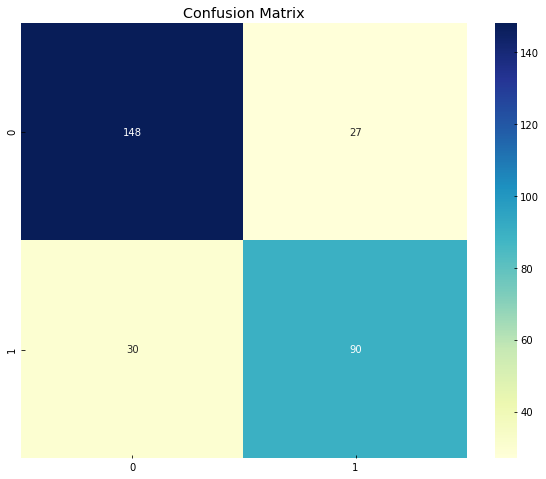

In [39]:
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('Accuracy for  LogisticRegression is ',metrics.accuracy_score(pred,y_test))
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt='g',cmap='YlGnBu') 
ax.set_title('Confusion Matrix')
plt.show()

In [40]:
#Decision Tree

Accuracy for DecisionTreeClassifier is  0.7898305084745763


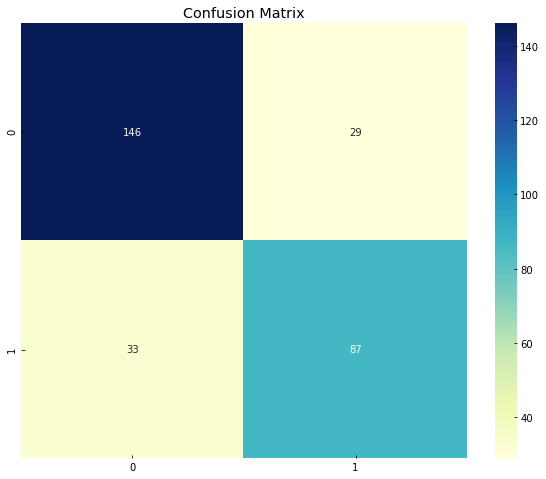

In [41]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('Accuracy for DecisionTreeClassifier is ',metrics.accuracy_score(pred,y_test))

plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt='g',cmap='YlGnBu') 
ax.set_title('Confusion Matrix')
plt.show()

In [42]:
#Random Forest Classifier

Accuracy for RandomForestClassifier is  0.823728813559322


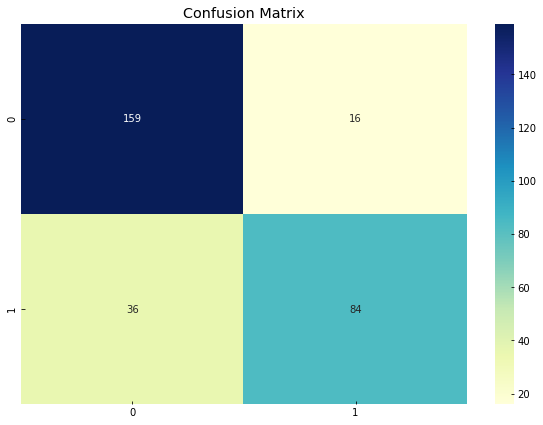

In [44]:
model = RandomForestClassifier(criterion='gini',n_estimators=1750,max_depth=7,min_samples_split=6,min_samples_leaf=6,
max_features='auto',oob_score=True,random_state=42,n_jobs=-1)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('Accuracy for RandomForestClassifier is ',metrics.accuracy_score(pred,y_test))

plt.figure(figsize=(10,7))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt='g',cmap='YlGnBu') 
ax.set_title('Confusion Matrix')
plt.show()